# 회귀분석 실습
- 출처 18기 DS 신혜연님

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 0. 필요한 라이브러리 불러오기

In [12]:
# numpy, pandas, seaborn, matplotlib, sklearn, statsmodels 설치하기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 1. 데이터 로드 및 확인

## 1-1. 데이터 로드

### Boston Housing Prices(보스턴 주택 가격 데이터)

1978년 보스턴 시의 주택 가격에 대한 데이터입니다. 주택의 여러가지 요인들과 주택의 가격 정보가 포함되어 있습니다.

+ 종속변수
    +  MEDV: 주택 가격 중앙값 ($1000)
+ 설명변수
     + CRIM: 1인당 범죄율
     + ZN: 25,000 평방피트 초과 거주지역 비율
     + INDUS: 비소매상업지역 면적 비율
     + CHAS: 찰스강 근접 여부
     + NOX: 10ppm당 일산화질소 농도
     + RM: 주택당 평균 방 개수
     + AGE: 1940년 이전에 건축된 주택의 비율
     + DIS: 보스턴 직업센터까지의 접근성 지수
     + RAD: 방사형 도로까지의 접근성 지수
     + TAX: 10,000 달러당 재산세율
     + PTRATIO: 학생/교사 비율
     + B: 인구 중 흑인 비율
     + LSTAT: 인구 중 하위계층의 비율

데이터 출처: https://www.kaggle.com/altavish/boston-housing-dataset

In [15]:
# 데이터 로드
df = pd.read_csv("./BostonHousingData.csv")

# 데이터 크기 확인
print("data size:", df.shape)

# 데이터 훑어보기
df.head(10)

data size: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,No,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,No,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,No,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,No,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,No,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,No,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,No,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,No,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


## 1-2. 결측치 확인

In [16]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
AGE        3.952569
LSTAT      3.952569
NOX        0.000000
RM         0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
MEDV       0.000000
dtype: float64

결측치를 다루는 다양한 방법은 지난 FE 교육세션에서 배우셨을 겁니다.  
원래 결측치는 주의깊게 다루어야 하지만 본 실습에서는 편의상 결측치가 존재하는 행 자체를 지워버리겠습니다.

In [17]:
df = df.dropna() 
df.shape

(394, 14)

## 1-3. 데이터 자료 형태 확인

In [ ]:
# 범주형 자료가 있는지를 확인해봅시다.
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS        object
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

'CHAS'가 범주형 자료이고 나머지 변수들은 모두 숫자형 자료입니다. 회귀분석을 진행하기 위해서 'CHAS'를 더미변수로 만들어줍시다.

In [18]:
df_dum = pd.get_dummies(df)
df_dum.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_No,CHAS_Yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1,0


## 1-4. 상관관계 분석

변수 간 상관관계를 살펴봅시다. 숫자형 자료에 대해서만 상관관계 분석이 가능하기 때문에 범주형 자료인 'CHAS'는 제외합니다.

In [19]:
# 'CHAS' 변수를 제거합니다.
df_cor = df.drop("CHAS", axis=1)

# corr을 통해 간단히 변수 간 피어슨 상관계수를 구할 수 있습니다.
df_cor.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
NOX,0.416160,-0.515660,0.762737,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864
PTRATIO,0.265428,-0.422164,0.395691,0.210216,-0.390686,0.264968,-0.228840,0.441949,0.446961,1.000000,-0.179816,0.395006,-0.543809


[]

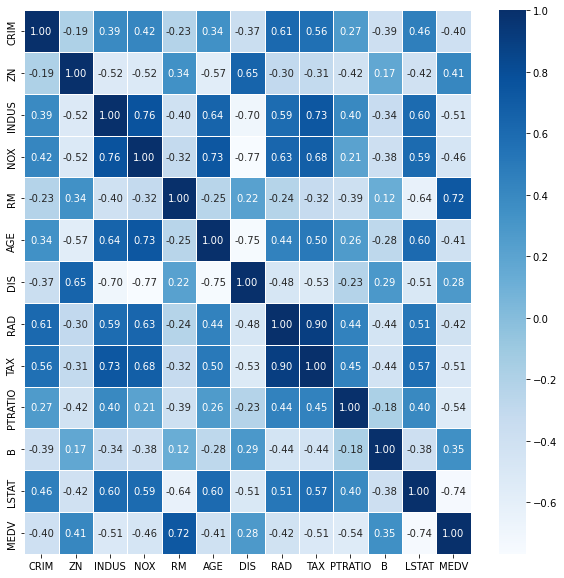

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df_cor.corr(), annot=True, fmt=".2f", linewidths=.5, cmap="Blues")
plt.plot()

## 1-5. 데이터 시각화

[]

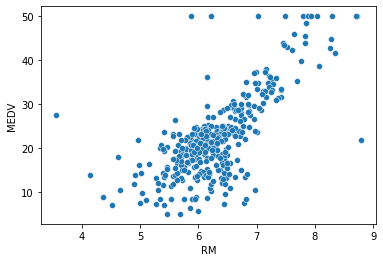

In [22]:
sns.scatterplot(x="RM", y="MEDV", data=df)
plt.plot()

[]

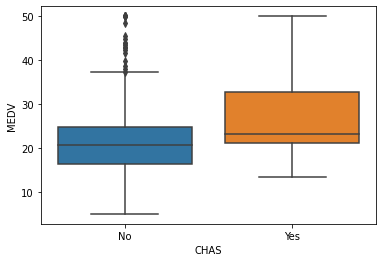

In [23]:
sns.boxplot(x="CHAS", y="MEDV", data=df)
plt.plot()

# 2. Linear Regression

선형회귀분석으로 주택 가격을 예측해봅시다.

In [24]:
# 먼저 종속변수와 설명변수를 지정해줍니다.
X = df_dum.drop("MEDV", axis=1)
y = df_dum["MEDV"]

In [ ]:
# 종속변수와 설명변수를 train 세트와 test 세트로 분리해줍니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
# 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (315, 14)
training response size: (315,)
test predictors size: (79, 14)
test response size: (79,)


In [ ]:
from sklearn.linear_model import LinearRegression

# 1. 먼저 모델을 만들어 줍니다.
linear = LinearRegression()

# 2. 모델을 적합시킵니다.
linear.fit(X_train, y_train)

# 3. train 세트에서의 성능을 확인합니다.
print("Training R^2: %.2f" % linear.score(X_train, y_train))

Training R^2: 0.76


In [ ]:
# 학습된 모델로부터 종속변수를 예측하고 MSE와 R^2를 구해봅시다.
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear.predict(X_test)

print("Test R^2: %.2f" % r2_score(y_test, y_pred))

Test R^2: 0.77


In [ ]:
# 모델의 회귀계수(intercept와 slope)를 확인해봅시다.
print("intercept:", linear.intercept_)
beta = pd.DataFrame(linear.coef_, index=X.columns, columns=["slope"])
beta.sort_values("slope")

intercept: 35.43233779298082


,slope
NOX,-18.967365
DIS,-1.527816
CHAS_No,-1.074498
PTRATIO,-0.969233
LSTAT,-0.445582
CRIM,-0.120960
AGE,-0.014254
TAX,-0.011536
B,0.009897
INDUS,0.053004


In [ ]:
# statsmodels를 이용해서 회귀분석을 할 수도 있습니다.
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     74.85
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           4.18e-86
Time:                        12:18:45   Log-Likelihood:                -926.15
No. Observations:                 315   AIC:                             1880.
Df Residuals:                     301   BIC:                             1933.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1210      0.037     -3.311      0.001      -0.193      -0.049
ZN             0.0550      0.018      3.110      0.002       0.020       0.090
INDUS          0.0530      0.086      0.615      0.539      -0.117       0.223
NOX          -18.9674      4.866     -3.898      0.000     -28.543      -9.392
RM             4.2499      0.526      8.074      0.000       3.214       5.286
AGE           -0.0143      0.017     -0.862      0.389      -0.047       0.018
DIS           -1.5278      0.249     -6.138      0.000      -2.018      -1.038
RAD            0.2897      0.082      3.536      0.000       0.128       0.451
TAX           -0.0115      0.005     -2.287      0.023      -0.021      -0.002
PTRATIO       -0.9692      0.167     -5.789      0.000      -1.299      -0.640
B              0.0099      0.003      2.902      0.004       0.003       0.017
LSTAT         -0.4456      0.063     -7.039      0.000      -0.570      -0.321
CHAS_No       34.3578      6.621      5.190      0.000      21.329      47.386
CHAS_Yes      36.5068      6.707      5.443      0.000      23.308      49.706
==============================================================================
Omnibus:                      129.612   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              674.452
Skew:                           1.643   Prob(JB):                    3.50e-147
Kurtosis:                       9.371   Cond. No.                     2.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3. Ridge & Lasso Regression

## 3-1. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# 1. 먼저 모델을 만들어 줍니다.
ridge = Ridge(alpha=0.5)

# 2. 모델을 적합시킵니다.
ridge.fit(X_train, y_train)

# 3. train 세트에서의 성능을 확인합니다.
print("Training R^2: %.2f" % ridge.score(X_train, y_train))

Training R^2: 0.76


In [ ]:
# 모델의 회귀계수(intercept와 slope)를 확인해봅시다.
print("intercept:", ridge.intercept_)
beta = pd.DataFrame(ridge.coef_, index=X_train.columns, columns=["slope"])
beta.sort_values("slope")

intercept: 30.402415782078133


,slope
NOX,-12.324547
DIS,-1.434818
CHAS_No,-1.054123
PTRATIO,-0.893936
LSTAT,-0.450136
CRIM,-0.118704
AGE,-0.019441
TAX,-0.011542
B,0.010495
INDUS,0.017585


In [ ]:
print("Test R^2 Score : %.2f" % ridge.score(X_test, y_test))

Test R^2 Score : 0.77


## 3-2. Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# 1. 먼저 모델을 만들어 줍니다.
lasso = Lasso(alpha=0.5)

# 2. 모델을 적합시킵니다.
lasso.fit(X_train, y_train)

# 3. train 세트에서의 성능을 확인합니다.
print("Training R^2: %.2f" % lasso.score(X_train, y_train))

Training R^2: 0.74


In [ ]:
# 모델의 회귀계수(intercept와 slope)를 확인해봅시다.
print("intercept:", lasso.intercept_)
beta = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=["slope"])
beta.sort_values("slope")

intercept: 27.986883394424197


,slope
DIS,-0.995561
PTRATIO,-0.727148
LSTAT,-0.567353
CRIM,-0.096730
TAX,-0.013589
AGE,-0.007530
INDUS,-0.002904
NOX,-0.000000
CHAS_No,-0.000000
CHAS_Yes,0.000000


In [ ]:
print("Test R^2 Score : %.2f" % lasso.score(X_test, y_test))

Test R^2 Score : 0.75
